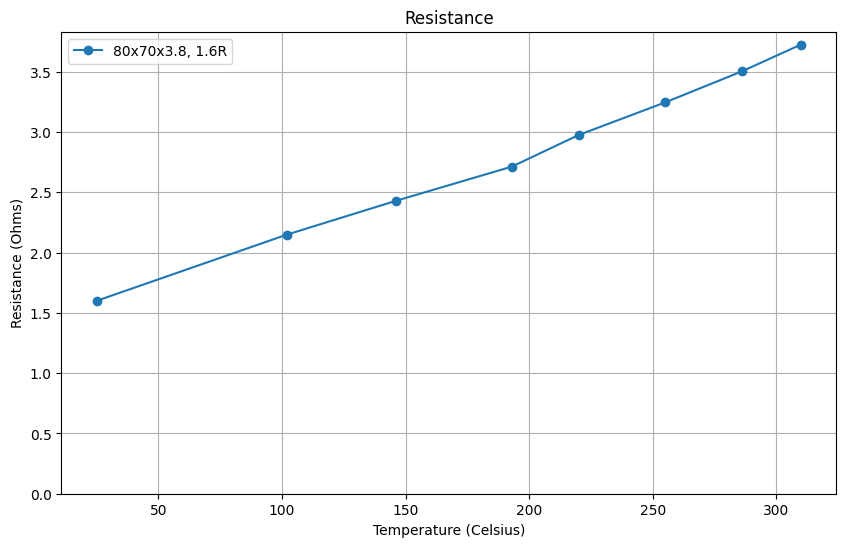

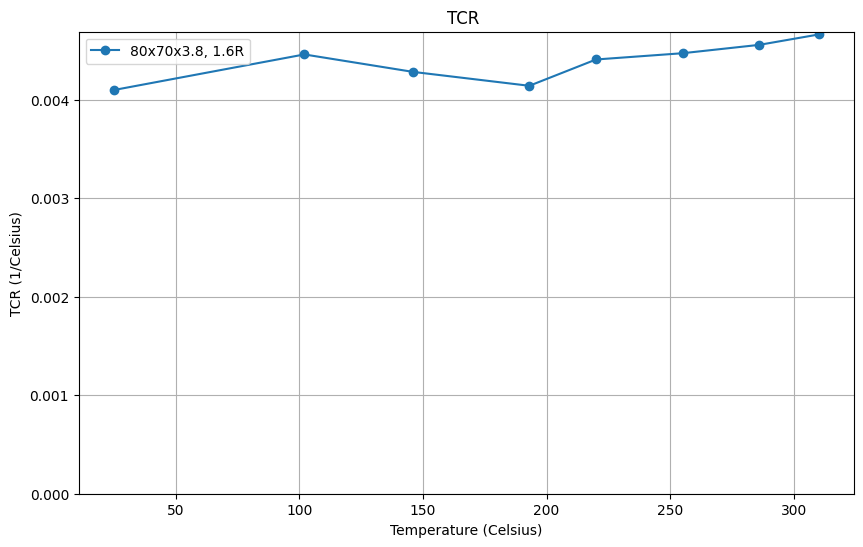

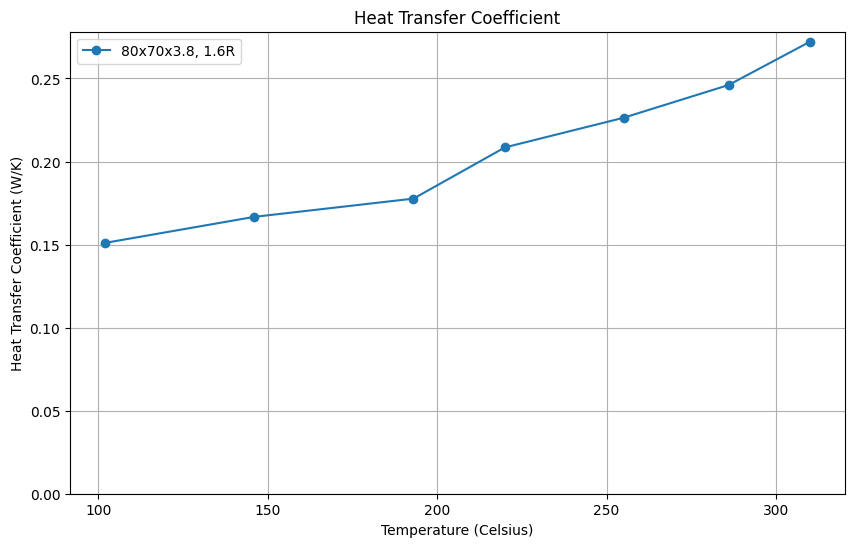

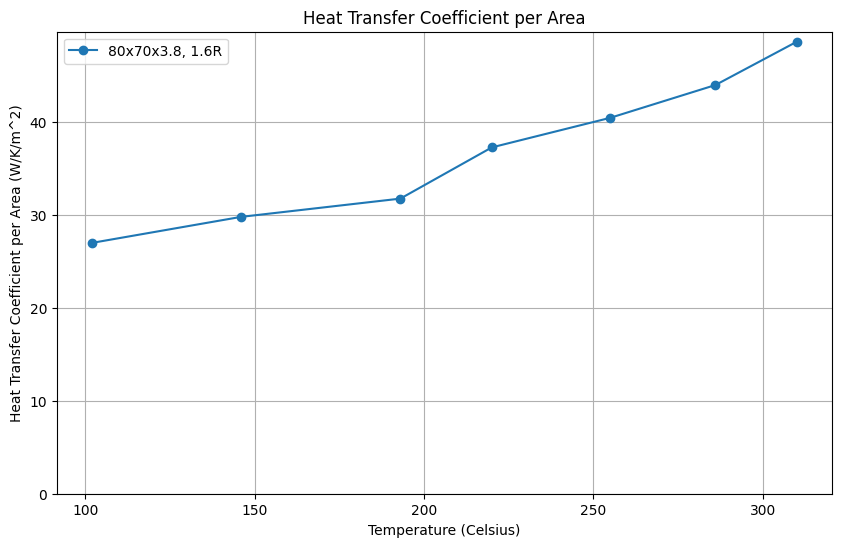

In [2]:

import matplotlib.pyplot as plt
from hotplate_model import HotplateModel  # Import the TUNGSTEN_TC constant

from heater_configs import heaters

# Prepare data for Resistance vs Temperature
plt.figure(figsize=(10, 6))
for heater in heaters:
    calibration_points = heater.calibration_points
    if len(calibration_points) < 2:
        continue
    
    temperatures = [point['T'] for point in calibration_points]
    resistances = [point['R'] for point in calibration_points]
    
    plt.plot(temperatures, resistances, 'o-', label=f"{heater.name}")
plt.title("Resistance")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Resistance (Ohms)")
plt.ylim(0)  # Start y-axis from 0
plt.legend()
plt.grid(True)
plt.show()

# Prepare data for TCR vs Temperature
plt.figure(figsize=(10, 6))
for heater in heaters:
    calibration_points = heater.calibration_points
    if len(calibration_points) < 2:
        continue
    
    temperatures = [point['T'] for point in calibration_points]
    resistances = [point['R'] for point in calibration_points]
    
    tcr = [
        (resistances[i] - resistances[0]) / (temperatures[i] - temperatures[0]) / resistances[0]
        for i in range(1, len(temperatures))
    ]
    tcr.insert(0, HotplateModel.TUNGSTEN_TC)  # Add the constant for the first point
    
    plt.plot(temperatures, tcr, 'o-', label=f"{heater.name}")
plt.title("TCR ")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("TCR (1/Celsius)")
plt.ylim(0)  # Start y-axis from 0
plt.legend()
plt.grid(True)
plt.show()

# Prepare data for Heat Transfer Coefficient vs Temperature
plt.figure(figsize=(10, 6))
for heater in heaters:
    calibration_points = heater.calibration_points
    if len(calibration_points) < 2:
        continue
    
    useable_points = [point for point in calibration_points if point['W'] != 0]
    temperatures = [point['T'] for point in useable_points]
    heat_transfer_coefficients = [
        point['W'] / (point['T'] - heater.get_room_temp()) for point in useable_points
    ]
    
    plt.plot(temperatures, heat_transfer_coefficients, 'o-', label=f"{heater.name}")
plt.title("Heat Transfer Coefficient")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Heat Transfer Coefficient (W/K)")
plt.ylim(0)  # Start y-axis from 0
plt.legend()
plt.grid(True)
plt.show()

# Prepare data for Heat Transfer Coefficient per Area vs Temperature
plt.figure(figsize=(10, 6))
for heater in heaters:
    calibration_points = heater.calibration_points
    if len(calibration_points) < 2:
        continue
    
    useable_points = [point for point in calibration_points if point['W'] != 0]
    temperatures = [point['T'] for point in useable_points]
    heat_transfer_coefficients = [
        point['W'] / (point['T'] - heater.get_room_temp()) for point in useable_points
    ]
    heat_transfer_coefficients_per_area = [
        htc / (heater.size['x'] * heater.size['y']) for htc in heat_transfer_coefficients
    ]
    
    plt.plot(temperatures, heat_transfer_coefficients_per_area, 'o-', label=f"{heater.name}")
plt.title("Heat Transfer Coefficient per Area")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Heat Transfer Coefficient per Area (W/K/m^2)")
plt.ylim(0)  # Start y-axis from 0
plt.legend()
plt.grid(True)
plt.show()
